# Mask R-CNN - Inspect Mars Crater Training Data

Inspect and visualize data loading and pre-processing code.

In [1]:
import os
import sys
import itertools
import math
import logging
import json
import re
import random
from collections import OrderedDict
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as lines
from matplotlib.patches import Polygon, Circle

ROOT_DIR = os.path.abspath("../../")

sys.path.append(ROOT_DIR)  
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log

%matplotlib inline 

## Configurations

Configurations are defined in crater.py

In [2]:
from samples.crater import crater

config = crater.CraterConfig()
CRATER_DIR = os.path.join(ROOT_DIR, "datasets")

## Dataset

In [3]:
# Load dataset
dataset = crater.CraterDataset()
dataset.load_crater(CRATER_DIR, "train")

# Must call before using the dataset
dataset.prepare()

print("Image Count: {}".format(len(dataset.image_ids)))
print("Class Count: {}".format(dataset.num_classes))
for i, info in enumerate(dataset.class_info):
    print("{:3}. {:50}".format(i, info['name']))

Image Count: 88
Class Count: 2
  0. BG                                                
  1. crater                                            


## Display Samples

Load and display images and masks.

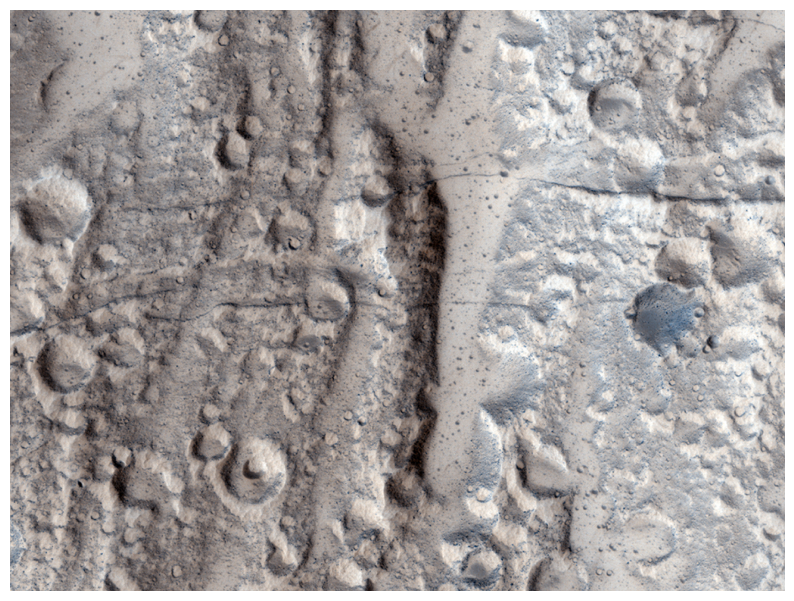

image                    shape: (768, 1024, 3)        min:    0.00000  max:  255.00000  uint8
mask                     shape: (768, 1024, 25)       min:    0.00000  max:    1.00000  bool
class_ids                shape: (25,)                 min:    1.00000  max:    1.00000  int32
bbox                     shape: (25, 4)               min:    0.00000  max:  954.00000  int32


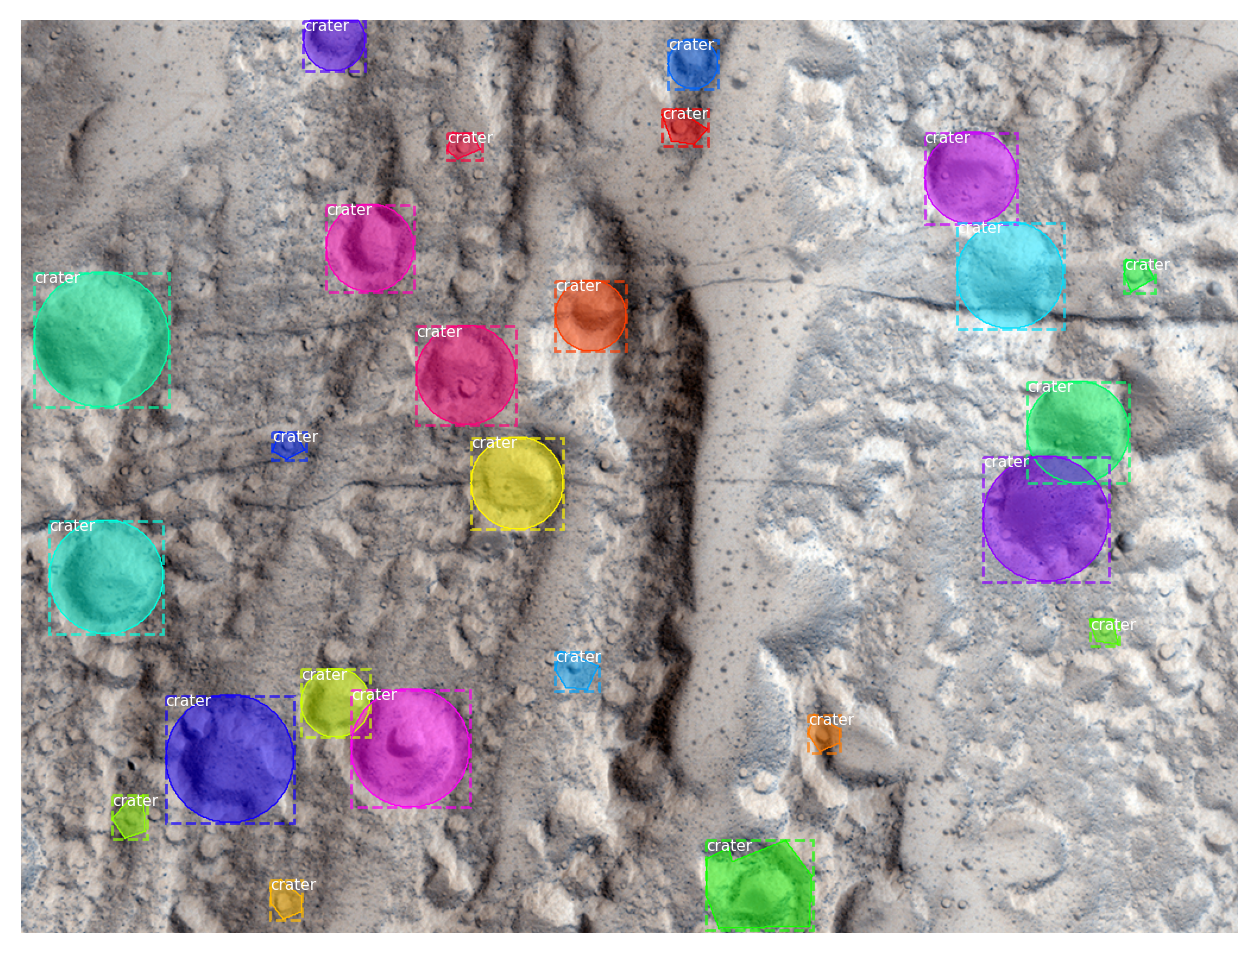

In [4]:
# Load random image and mask.
image_ids = np.random.choice(dataset.image_ids,1)
image_id=30
image = dataset.load_image(image_id)
mask, class_ids = dataset.load_mask(image_id)
# Compute Bounding box
bbox = utils.extract_bboxes(mask)

# Display image and additional stats
#    print("image_id ", image_id, dataset.image_reference(image_id))

# Display image and instances
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show
plt.show()

log("image", image)
log("mask", mask)
log("class_ids", class_ids)
log("bbox", bbox)
visualize.display_instances(image, bbox, mask, class_ids, dataset.class_names)